# Устранение пропусков в данных

In [ ]:
%pip install geoplot

In [70]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, LabelEncoder
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt


In [71]:
df = pd.read_csv('my_dataset.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [72]:
def give_me_num_passes(data):
  print("Количество строк в датасете", len(data.axes[0]))
  bad_cols = []
  for col in data.columns:
      if data[col].isnull().sum(): # если есть хоть 1 пустое
          bad_cols.append(col) # заносим в список плохих
      print(f'{col}: {data[col].isnull().sum()} ({round(data[col].isnull().sum() / data.shape[0] * 100, 3)}%)') # процент плохих
  print('Колонки в которых есть пропуски:', bad_cols)
give_me_num_passes(df)

Количество строк в датасете 150930
Unnamed: 0: 0 (0.0%)
country: 5 (0.003%)
description: 0 (0.0%)
designation: 45735 (30.302%)
points: 0 (0.0%)
price: 13695 (9.074%)
province: 5 (0.003%)
region_1: 25060 (16.604%)
region_2: 89977 (59.615%)
variety: 0 (0.0%)
winery: 0 (0.0%)
Колонки в которых есть пропуски: ['country', 'designation', 'price', 'province', 'region_1', 'region_2']


In [73]:
print("Количество уникальных значений")
for col in df.columns:
    print(f'{col}: {df[col].unique().size}')

Количество уникальных значений
Unnamed: 0: 150930
country: 49
description: 97821
designation: 30622
points: 21
price: 358
province: 456
region_1: 1237
region_2: 19
variety: 632
winery: 14810


In [74]:
#Очистим данные (удалим строки где есть пропуски)
print("очищаем датасет и заносим очищенный в df_clean")
df_clean = df.dropna()
# И проверим на наличие пропусков
give_me_num_passes(df_clean)

print()
print("Подтверждение того, что строки удалились только в датасете df_clean")
give_me_num_passes(df)

очищаем датасет и заносим очищенный в df_clean
Количество строк в датасете 39241
Unnamed: 0: 0 (0.0%)
country: 0 (0.0%)
description: 0 (0.0%)
designation: 0 (0.0%)
points: 0 (0.0%)
price: 0 (0.0%)
province: 0 (0.0%)
region_1: 0 (0.0%)
region_2: 0 (0.0%)
variety: 0 (0.0%)
winery: 0 (0.0%)
Колонки в которых есть пропуски: []

Подтверждение того, что строки удалились только в датасете df_clean
Количество строк в датасете 150930
Unnamed: 0: 0 (0.0%)
country: 5 (0.003%)
description: 0 (0.0%)
designation: 45735 (30.302%)
points: 0 (0.0%)
price: 13695 (9.074%)
province: 5 (0.003%)
region_1: 25060 (16.604%)
region_2: 89977 (59.615%)
variety: 0 (0.0%)
winery: 0 (0.0%)
Колонки в которых есть пропуски: ['country', 'designation', 'price', 'province', 'region_1', 'region_2']


In [75]:
df_num = df.select_dtypes(include=np.number).columns.tolist() # Определим какие столбцы численные
print(df_num)
df_categ = [item for item in df.columns.tolist() if item not in df_num] # Определим какие столбцы и остальные
print(df_categ)

['Unnamed: 0', 'points', 'price']
['country', 'description', 'designation', 'province', 'region_1', 'region_2', 'variety', 'winery']


In [76]:
for i in df_num: # вставляем вместо пропусков в числовых столбцах среднее значение в столбце
  df[i].fillna(df[i].mean(), inplace=True)
give_me_num_passes(df)

Количество строк в датасете 150930
Unnamed: 0: 0 (0.0%)
country: 5 (0.003%)
description: 0 (0.0%)
designation: 45735 (30.302%)
points: 0 (0.0%)
price: 0 (0.0%)
province: 5 (0.003%)
region_1: 25060 (16.604%)
region_2: 89977 (59.615%)
variety: 0 (0.0%)
winery: 0 (0.0%)
Колонки в которых есть пропуски: ['country', 'designation', 'province', 'region_1', 'region_2']


In [77]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0])) # вставляем вместо пропусков в категориальных столбцах самые часто встречаемые значения
give_me_num_passes(df)

Количество строк в датасете 150930
Unnamed: 0: 0 (0.0%)
country: 0 (0.0%)
description: 0 (0.0%)
designation: 0 (0.0%)
points: 0 (0.0%)
price: 0 (0.0%)
province: 0 (0.0%)
region_1: 0 (0.0%)
region_2: 0 (0.0%)
variety: 0 (0.0%)
winery: 0 (0.0%)
Колонки в которых есть пропуски: []


# Кодирование категориальных признаков

In [78]:
# df_categ категориальные столбцы
print("Количество уникальных значений\n")
for col in df_categ:
    print(f'{col}: {df[col].unique().size}')

Количество уникальных значений

country: 48
description: 97821
designation: 30621
province: 455
region_1: 1236
region_2: 18
variety: 632
winery: 14810


Все категориальные значения имеют большое кол-во уникальных значений, поэтому применяем тип кодирования Label Encoder

In [79]:
# labelencoder = LabelEncoder()
# df_1 = labelencoder.fit_transform(df["country"])
# df.insert(1, 'country_code', df_1)
# del df['column_name']

In [80]:
labelencoder = LabelEncoder()
for i in df_categ:
  df_1 = labelencoder.fit_transform(df[i])
  df.insert(1, i + "_code", df_1)
  del df[i]

In [81]:
df

,Unnamed: 0,winery_code,variety_code,region_2_code,region_1_code,province_code,designation_code,description_code,country_code,points,price
0,0,7287,70,7,738,51,17272,88314,44,96,235.0
1,1,1231,553,1,1070,274,4399,56025,40,96,110.0
2,2,9033,468,13,528,51,25383,44596,44,96,90.0
3,3,11002,402,17,1222,282,22308,87821,44,96,65.0
4,4,5410,422,1,66,313,14261,84629,15,95,66.0
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,6282,616,1,434,359,22308,46140,22,91,20.0
150926,150926,7138,106,1,197,72,7257,49514,15,91,27.0
150927,150927,13185,616,1,434,359,26593,76212,22,91,20.0
150928,150928,6935,106,1,197,72,11569,8706,15,90,52.0


# Нормализация числовых признаков

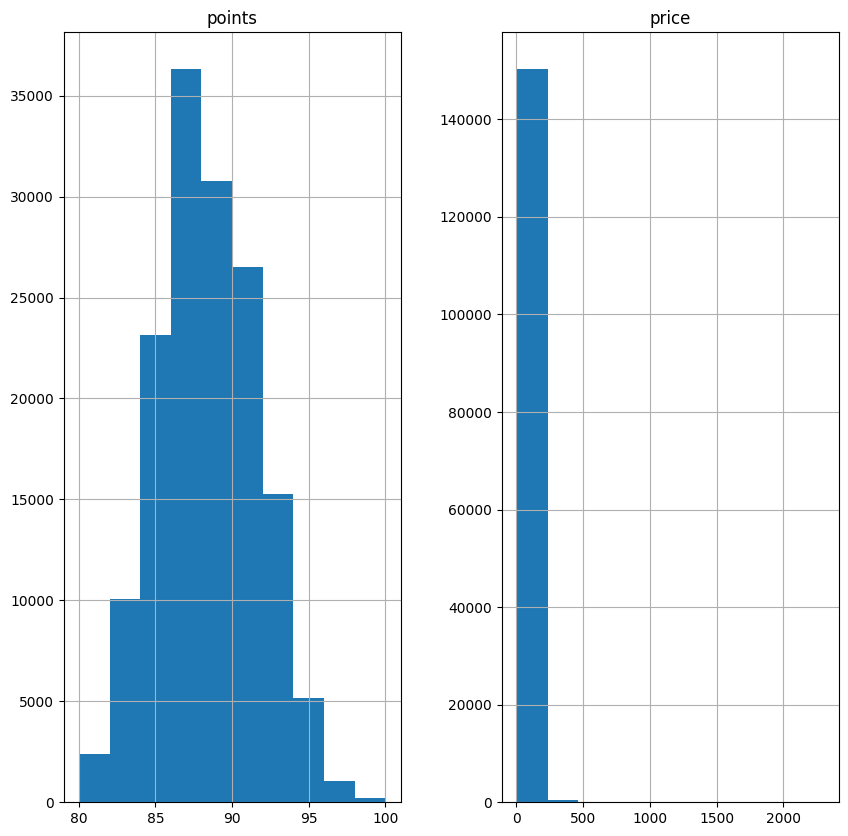

In [82]:
df[['points', 'price']].hist(figsize=(10,10));


In [83]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

всего 2 числовый признака

Проанализируем points

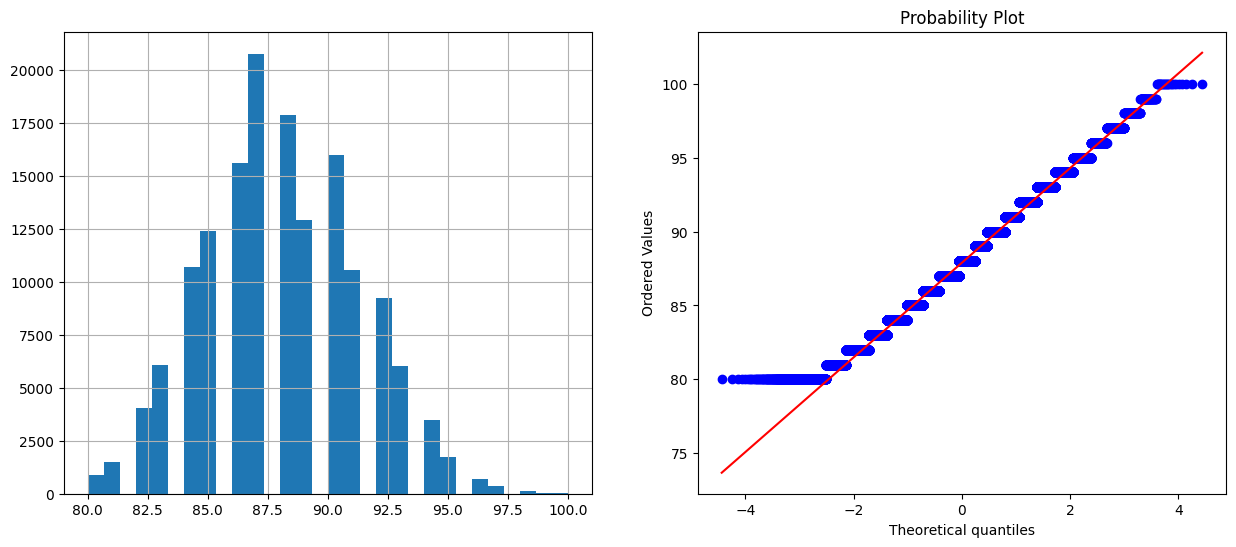

In [84]:
diagnostic_plots(df, 'points')

Оптимальное значение λ = -0.5411688334227455


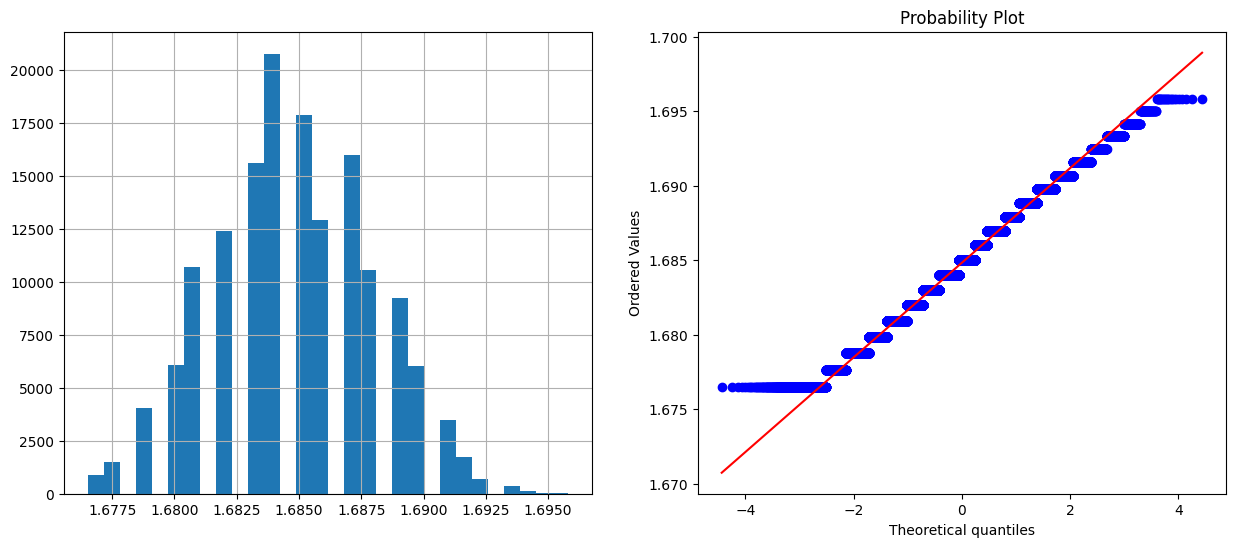

In [85]:
df['points'] = df['points'].astype('float')
df['points_yeojohnson'], param = stats.yeojohnson(df['points'])
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(df, 'points_yeojohnson')

Самое близкое- нормальное

Теперь проанализируем price

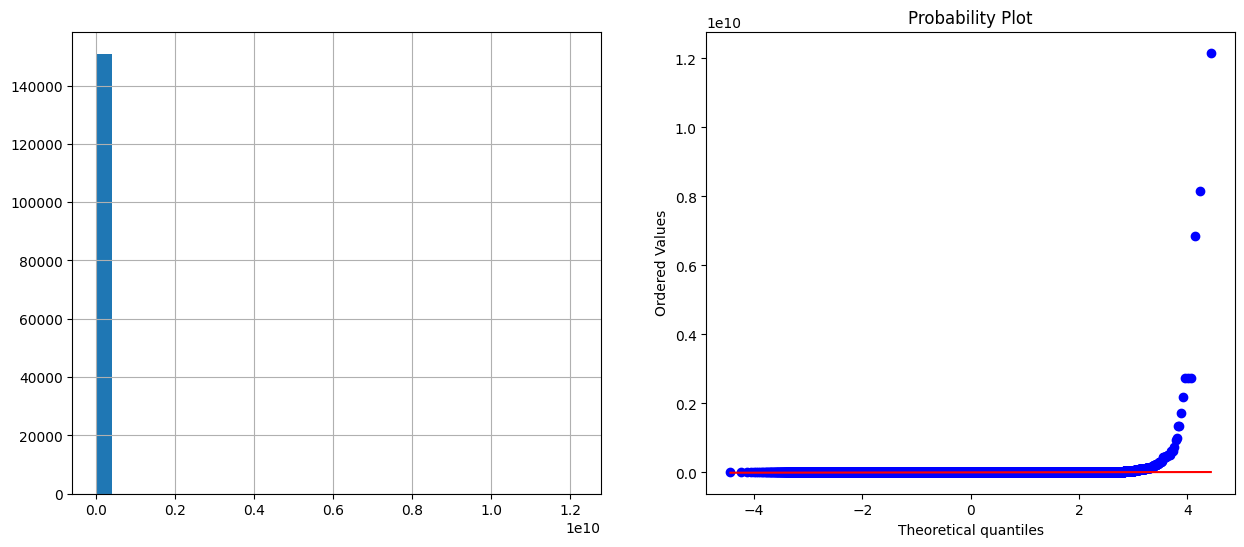

In [86]:
df['price_exp1'] = df['price']**(3)
diagnostic_plots(df, 'price_exp1')

Оптимальное значение λ = -0.2908297301228935


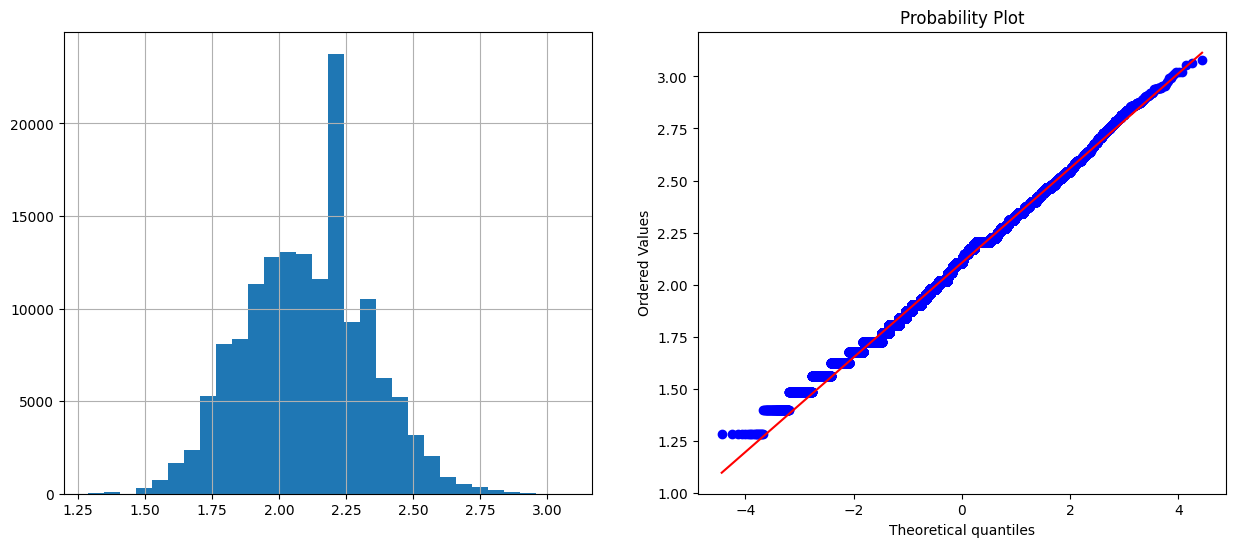

In [87]:
df['price'] = df['price'].astype('float')
df['price_yeojohnson'], param = stats.yeojohnson(df['price'])
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(df, 'price_yeojohnson')

Лучший результат у преобразования Йео-Джонсона